In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from bidi.algorithm import get_display
from arabic_reshaper import reshape

A. Orders count per month (Plot).

In [2]:
digiorder=pd.read_csv("digikala-orders.csv")
digiorder.head(10)

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item
0,2714054,469662,21386,2015-10-15 08:50:56.000,597982.0,محمود آباد,1.0
1,11104039,3063877,248497,2018-02-11 00:29:26.000,980000.0,خرمدره,1.0
2,4228130,3184893,50144,2016-06-14 00:30:08.000,229358.0,قرچک,1.0
3,22225624,6888562,70208,2018-09-03 14:37:19.000,16514.0,قم,1.0
4,4068771,2533490,67627,2016-05-21 11:51:02.000,133028.0,تهران,1.0
5,11479246,2841640,312932,2018-03-01 12:07:15.000,290000.0,مشهد,1.0
6,8267421,5235886,42365,2017-08-19 13:30:24.000,55046.0,اصفهان,1.0
7,11588978,5574955,715680,2018-03-04 19:19:02.000,2790000.0,رشت,1.0
8,9916301,1145709,102588,2017-12-11 19:33:59.000,34862.0,تهران,1.0
9,10740652,4928230,658519,2018-01-23 06:11:34.000,2600000.0,خرمشهر,1.0


In [3]:
digiorder['DateTime_CartFinalize']=pd.to_datetime(digiorder['DateTime_CartFinalize'])
digiorder['New_date']=digiorder['DateTime_CartFinalize'].map(lambda date: date.year*100+date.month)

digiorder.head(5)

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item,New_date
0,2714054,469662,21386,2015-10-15 08:50:56,597982.0,محمود آباد,1.0,201510
1,11104039,3063877,248497,2018-02-11 00:29:26,980000.0,خرمدره,1.0,201802
2,4228130,3184893,50144,2016-06-14 00:30:08,229358.0,قرچک,1.0,201606
3,22225624,6888562,70208,2018-09-03 14:37:19,16514.0,قم,1.0,201809
4,4068771,2533490,67627,2016-05-21 11:51:02,133028.0,تهران,1.0,201605


In [4]:
tx_order_per_month=digiorder.groupby(['New_date'])['Quantity_item'].sum().reset_index()
tx_order_per_month["New_date"]=pd.to_datetime(tx_order_per_month['New_date'],format='%Y%m')
tx_order_per_month["str_date"]=tx_order_per_month['New_date'].map(lambda date: f'{date.year}/{date.month}')
tx_order_per_month.head(5)

,New_date,Quantity_item,str_date
0,2013-09-01,7.0,2013/9
1,2013-10-01,77.0,2013/10
2,2013-11-01,104.0,2013/11
3,2013-12-01,125.0,2013/12
4,2014-01-01,156.0,2014/1


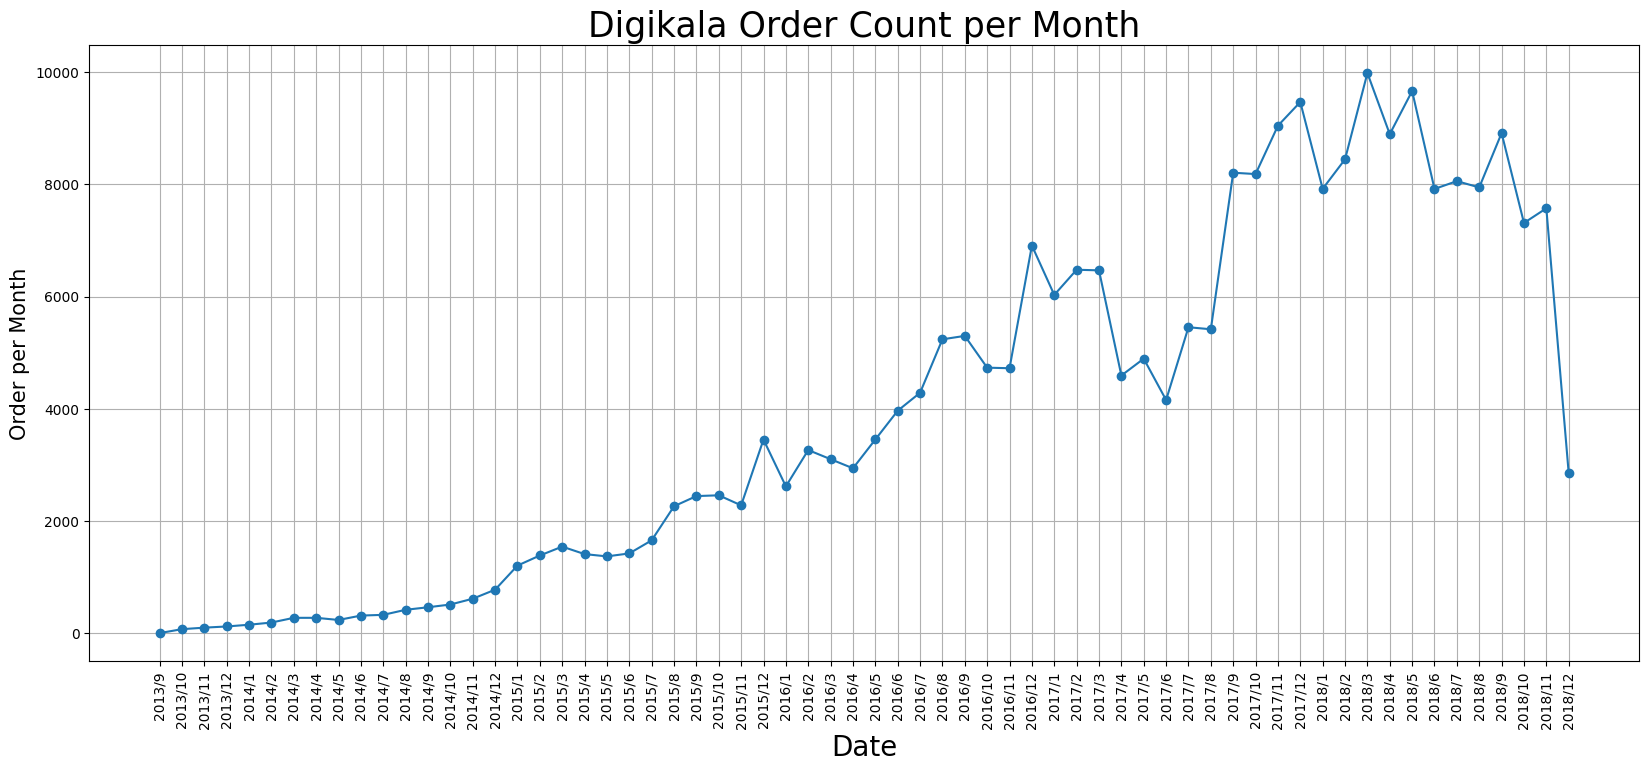

In [6]:
plt.figure(figsize=(20,8))
plt.plot(tx_order_per_month['str_date'].to_numpy(dtype=str),tx_order_per_month['Quantity_item'].to_numpy(),marker='o')
plt.xticks(rotation=90)
plt.grid()
plt.xlabel('Date',fontsize=20)
plt.ylabel('Order per Month',fontsize=15)
plt.title("Digikala Order Count per Month",fontsize=25)
plt.show()
# plt.savefig('Digikala Order Count per Month.png')

B. Plot the death rate in Iran on different days.


,index,city_name_fa,Count
0,76,اصفهان,5992
1,97,اهواز,4313
2,215,تهران,108306
3,355,رشت,3204
4,505,شیراز,4065
5,654,مشهد,6024
6,815,کرج,5934
11,0,بقیه شهرها,62162


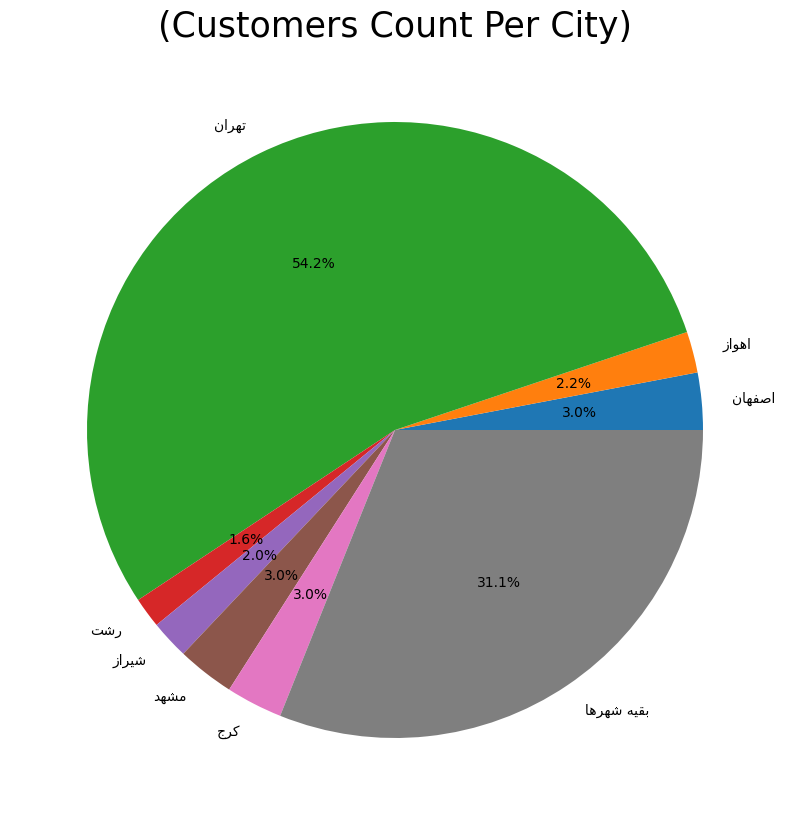

In [9]:
plt.figure(figsize=(20,10))
tx_count_per_city=digiorder.pivot_table(index = ['city_name_fa'], aggfunc ='size')
tx_count_per_city=pd.DataFrame(tx_count_per_city).reset_index()
tx_count_per_city.rename(columns={0:'Count'},inplace=True)
tx_high=tx_count_per_city.query('Count>3000').reset_index()
tx_low=tx_count_per_city.query('Count<3000').reset_index()
sum_low=tx_low['Count'].sum()
tx_high.loc['11']=['0','بقیه شهرها',sum_low]

y=tx_high['Count'].to_numpy()
persian_labels = [get_display(reshape(label)) for label in tx_high['city_name_fa']]
plt.pie(y,labels=persian_labels, autopct='%1.1f%%')
title=get_display(reshape("(Customers Count Per City)" ))
plt.title(title, fontsize=25)
tx_high.head(13)